In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Importing the dataset

df = pd.read_csv(r'C:\Users\yashp\Desktop\Projects\Employee_Layoffs_dataset\layoffs.csv')

In [ ]:
# Loading dataset

df.head()

In [3]:
df.shape

(1651, 9)

In [4]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         476
percentage_laid_off    546
date                     0
stage                    4
country                  0
funds_raised           115
dtype: int64

In [5]:
# Lets fix some issues with the data here

#  droping some columns and fix some NaN values in dataset

df = df.drop(['funds_raised','percentage_laid_off', 'stage'], axis=1)
df.total_laid_off = df.total_laid_off.fillna(1) # lets assume there must be atleast 1 reported layoff in any company in this dataset
df.industry = df.industry.fillna('Unknown')
df.total_laid_off = df.total_laid_off.astype(int) # layoffs should be whole numbers not floats

In [6]:
# Now let see the dataset again

df.shape

(1651, 6)

In [7]:
df.isna().sum()

company           0
location          0
industry          0
total_laid_off    0
date              0
country           0
dtype: int64

<AxesSubplot:>

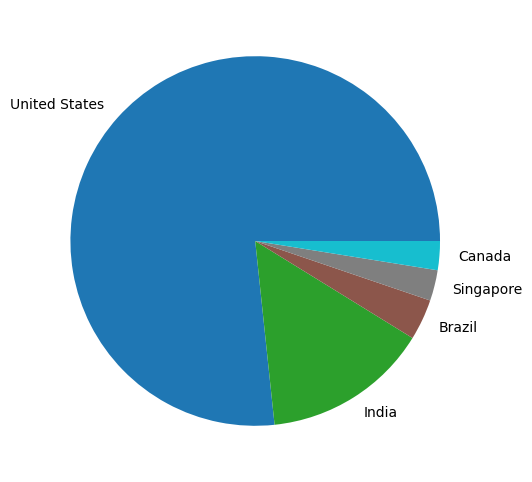

In [8]:
# Alright! It's time to analyse the data

# Top 5 countries affected by layoffs

df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    ylabel="", figsize=(6,6), kind='pie', stacked=True, colormap='tab10')

<AxesSubplot:>

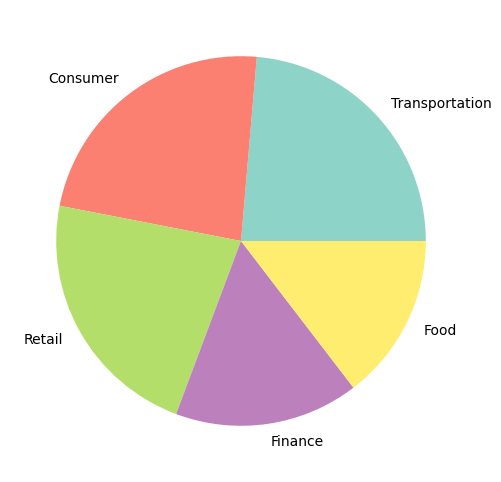

In [9]:
# Top 5 industry affected by layoffs

df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    ylabel="",figsize=(6,6), kind='pie', stacked=True, colormap='Set3')

<AxesSubplot:>

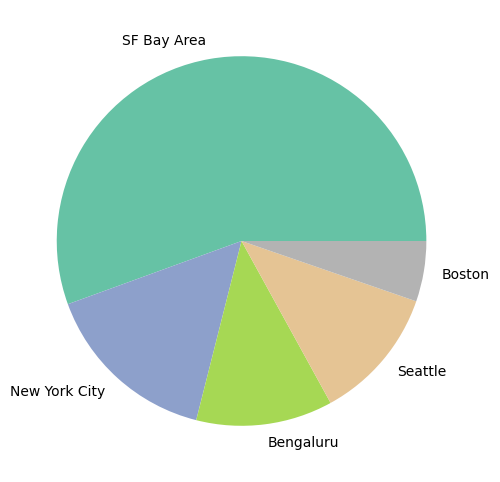

In [10]:
# Top 5 location affected world wide

df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    ylabel="",figsize=(6,6), kind='pie', stacked=True, colormap='Set2')

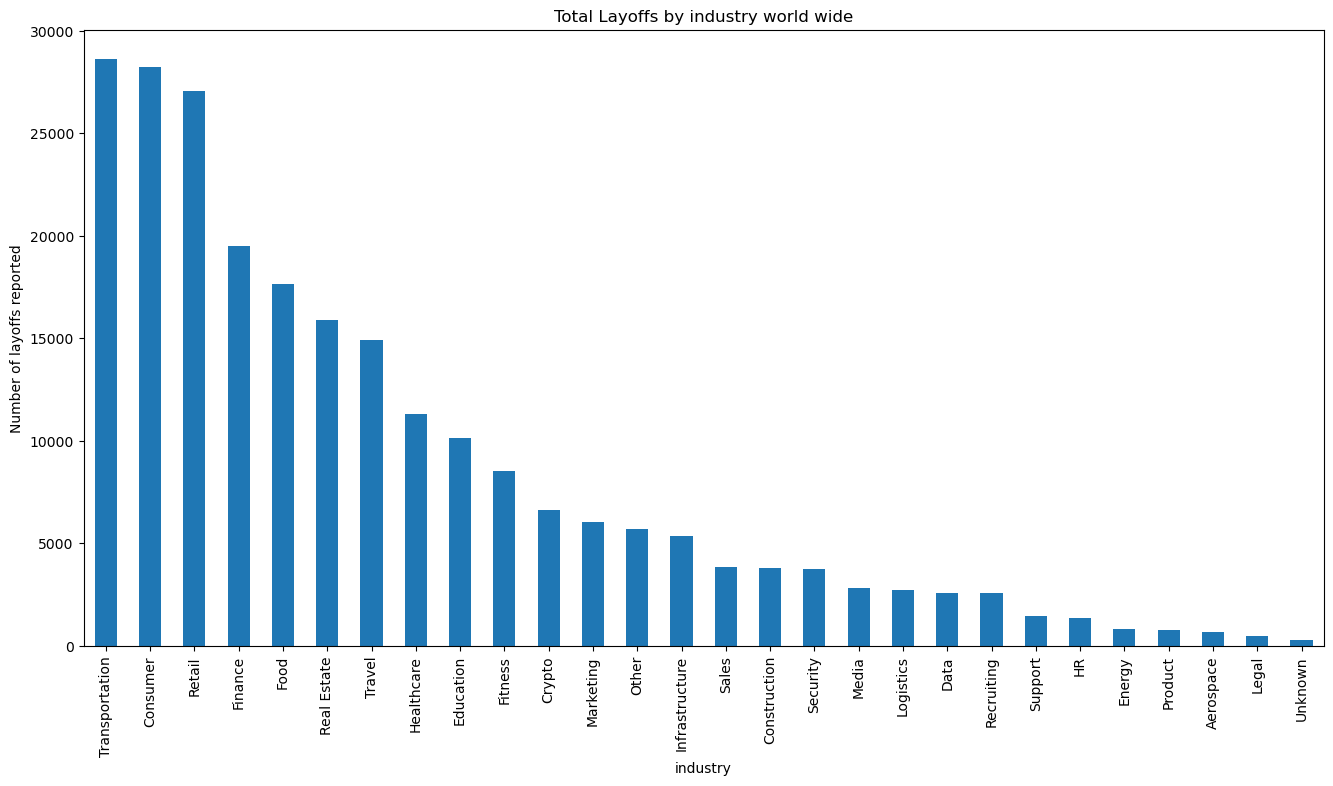

In [11]:
# Total layoffs by industry

plt.figure(figsize=(10, 6))
plt.title("Total Layoffs by industry world wide")
plt.ylabel("Number of layoffs reported")
df_industries = df.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False).plot(
    figsize=(16,8), kind='bar', stacked=True, colormap='tab10')

In [12]:
df = df.set_index('date')
df_2022 = df.loc[:'2022']
df_2021 = df.loc[(df.index > '2021-01-01')&(df.index < '2022-01-01')]
df_2020 = df.loc[(df.index > '2020-01-01')&(df.index < '2021-01-01')]

In [13]:
# Top 5 companies that laid off their employees in 2022

df_2022_most_layoffs = df_2022.sort_values(by='total_laid_off', ascending=False)
df_2022_most_layoffs.head()

,company,location,industry,total_laid_off,country
date,,,,,
2022-11-09,Meta,SF Bay Area,Consumer,11000,United States
2022-11-16,Amazon,Seattle,Retail,10000,United States
2022-11-16,Cisco,SF Bay Area,Infrastructure,4100,United States
2022-11-04,Twitter,SF Bay Area,Consumer,3700,United States
2022-03-08,Better.com,New York City,Real Estate,3000,United States


In [14]:
# Top 5 companies that laid off their employees in 2021

df_2021_most_layoffs = df_2021.sort_values(by='total_laid_off', ascending=False)
df_2021_most_layoffs.head()

,company,location,industry,total_laid_off,country
date,,,,,
2021-06-01,Katerra,SF Bay Area,Construction,2434,United States
2021-11-02,Zillow,Seattle,Real Estate,2000,United States
2021-01-21,Instacart,SF Bay Area,Food,1877,United States
2021-01-06,WhiteHat Jr,Mumbai,Education,1800,India
2021-08-05,Bytedance,Shanghai,Consumer,1800,China


In [15]:
# Top 5 companies that laid off their employees in 2020

df_2020_most_layoffs = df_2020.sort_values(by='total_laid_off', ascending=False)
df_2020_most_layoffs.head()

,company,location,industry,total_laid_off,country
date,,,,,
2020-07-30,Booking.com,Amsterdam,Travel,4375,Netherlands
2020-05-06,Uber,SF Bay Area,Transportation,3700,United States
2020-05-18,Uber,SF Bay Area,Transportation,3000,United States
2020-04-13,Groupon,Chicago,Retail,2800,United States
2020-05-05,Airbnb,SF Bay Area,Travel,1900,United States


<AxesSubplot:title={'center':'Layoffs in 2022 by Industry'}, xlabel='industry', ylabel='No of layoffs'>

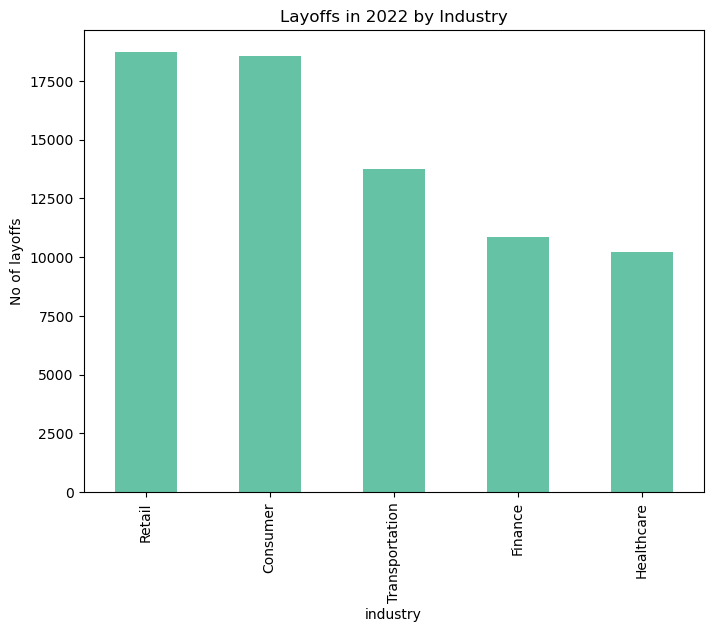

In [16]:
# Layoffs in 2022 by industry

df_2022.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    title ="Layoffs in 2022 by Industry" ,ylabel="No of layoffs", figsize=(8,6), 
    kind='bar', stacked=True, colormap='Set2')

<AxesSubplot:title={'center':'Layoffs in 2021 by Industry'}, xlabel='industry', ylabel='No of layoffs'>

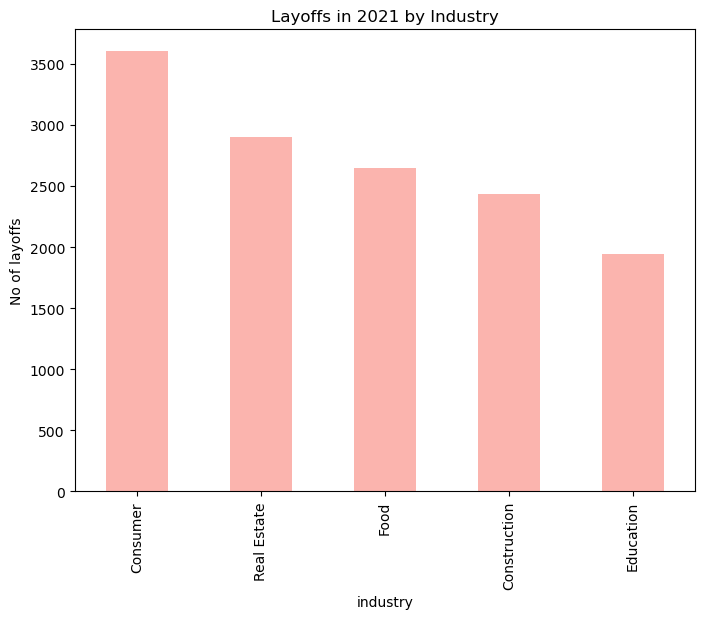

In [17]:
# Layoffs in 2021 by industry

df_2021.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    title ="Layoffs in 2021 by Industry" ,ylabel="No of layoffs", figsize=(8,6), 
    kind='bar', stacked=True, colormap='Pastel1')

<AxesSubplot:title={'center':'Layoffs in 2020 by Industry'}, xlabel='industry', ylabel='No of layoffs'>

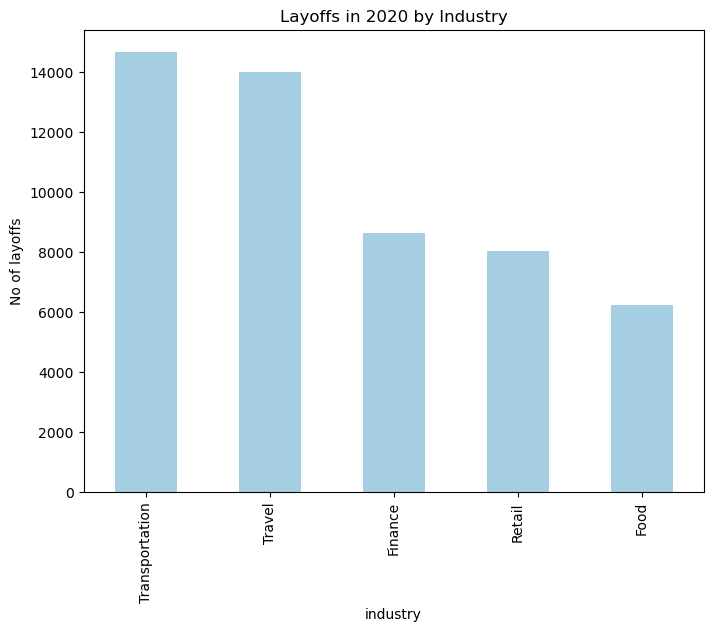

In [18]:
# Layoffs in 2020 by industry

df_2020.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    title ="Layoffs in 2020 by Industry" ,ylabel="No of layoffs", figsize=(8,6), 
    kind='bar', stacked=True, colormap='Paired')

In [19]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df_industry = df.groupby([ df.industry, df.date.dt.year]).sum()
# df_industry.sort_values(by=['total_laid_off','date'], ascending=False)

In [20]:
df_industry = df_industry.reset_index()

<AxesSubplot:title={'center':'Yearly layoffs by Industry'}, xlabel='industry', ylabel='total_laid_off'>

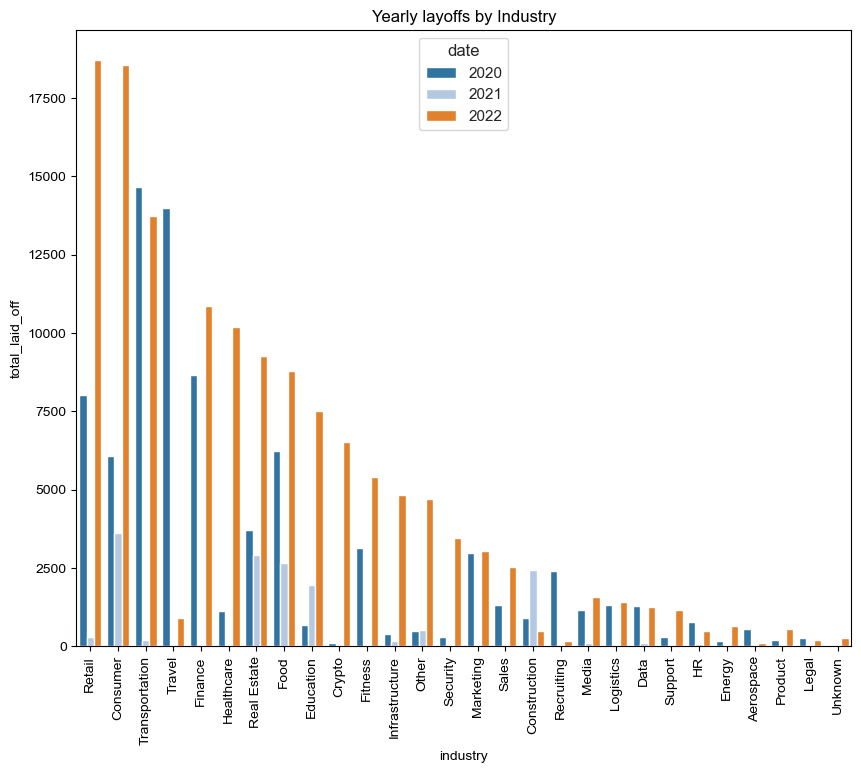

In [21]:
# Yearly layoffs by Industry

plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
plt.title("Yearly layoffs by Industry")
sns.set(style="white", palette="tab20", color_codes=True)

sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), 
            x="industry", y="total_laid_off", hue="date")

# Yearly layoff trend for the whole world shows that

- Layoffs were generally higher in 2020, then they dropped in 2021 and skyrocketed in 2022

- Initially Transportation and Travel industries got affected more as shown by the layoffs in 2020 but they somewhat recovered later

- Retail, Consumer and Food industries face sharp increase in layoffs

In [22]:
# Let's analyze the data specifically for the USA as employee layoffs are highest in the country

df_usa = df[df['country']=="United States"]
df_minus_usa = df[df['country']!="United States"]

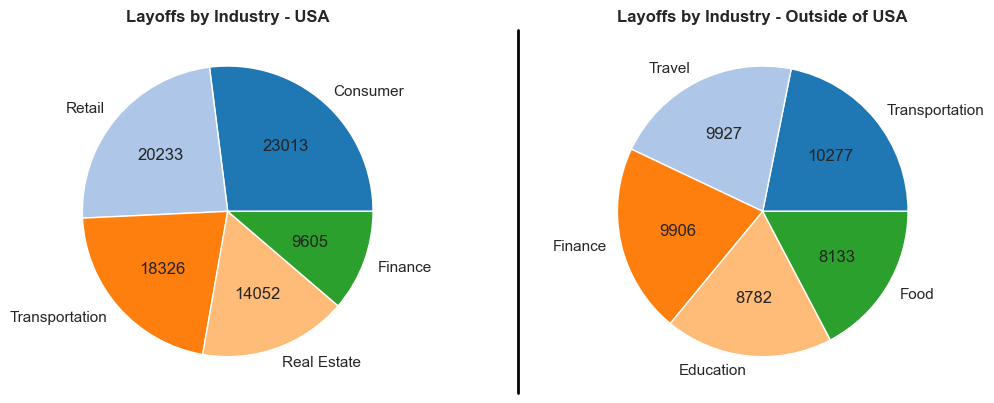

In [23]:
# isolate data to be plotted
d1 = df_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Layoffs by Industry - USA", fontweight='bold')
ax2.set_title("Layoffs by Industry - Outside of USA", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

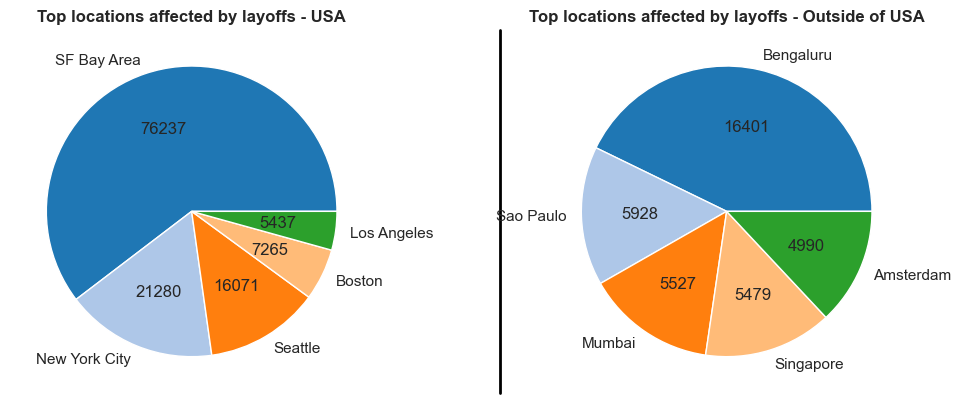

In [24]:
# isolate data to be plotted
d1 = df_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("Top locations affected by layoffs - USA", fontweight='bold')
ax2.set_title("Top locations affected by layoffs - Outside of USA", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))

# insert line between subplots
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

In [25]:
# Let's look at the yearly layoffs in USA by Industry

df_usa_industry_yearly = df_usa.groupby([ df_usa.industry, df_usa.date.dt.year]).sum()

In [26]:
df_usa_industry_yearly = df_usa_industry_yearly.reset_index()

<AxesSubplot:title={'center':'Yearly layoffs in USA by Industry'}, xlabel='industry', ylabel='total_laid_off'>

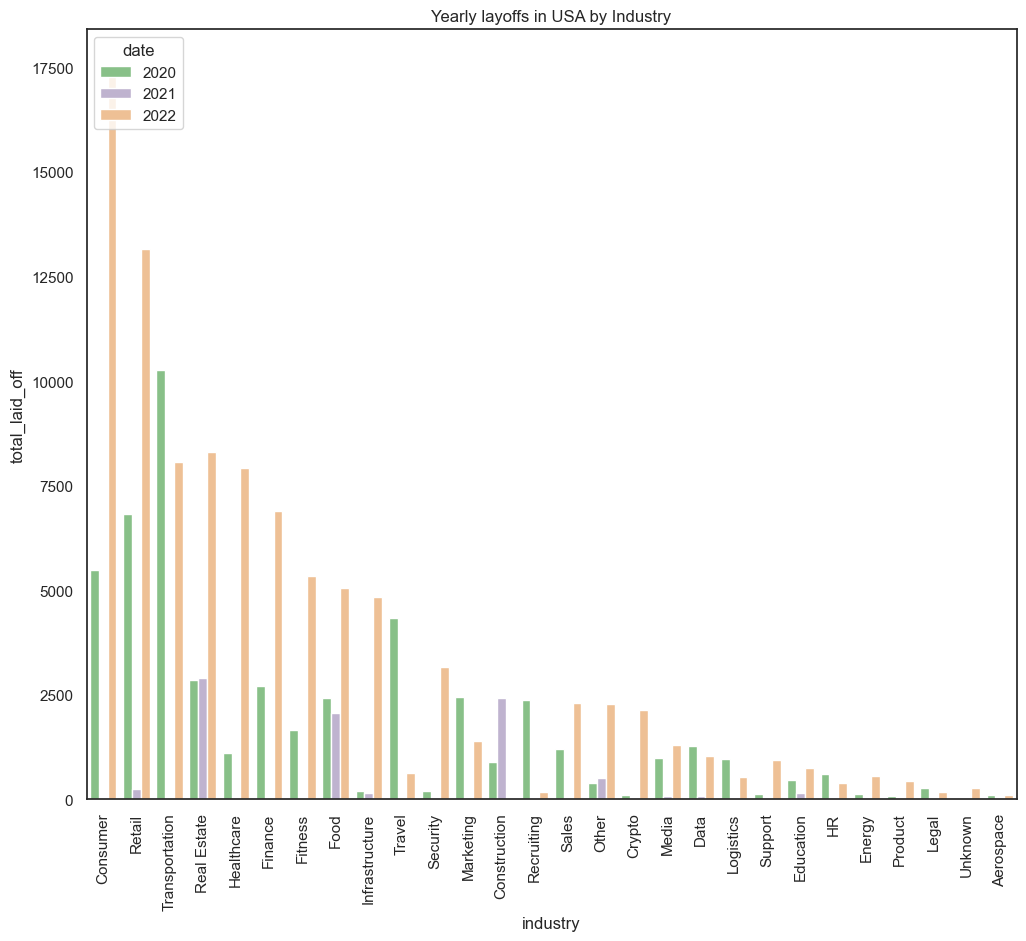

In [27]:
plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in USA by Industry")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_usa_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), 
            x="industry", y="total_laid_off", hue="date")

# Yearly layoff trend for United States shows that

- Layoffs were generally higher in 2020, then they dropped in 2021 and skyrocketed in 2022.

- Initially Transportation and Travel industries got affected more as shown by the layoffs in 2020 but they somewhat recovered later.

- Consumer, Retail, Real Estate, Healthcare, Food and Fitness industries face sharp increase in layoffs in 2022 compared to 2020.

- Yearly layoff trend for the whole world matches with that of yearly trend in USA in the sense that layoffs were higher in 2020, then they dropped in 2021 and skyrocketed in 2022. This may be because majority of data in the dataset is about USA.

# Final Analysis

- United States suffered most layoffs followed by India, compared to the rest of the world. More than 75% of the employees laid off since 2020 belong to USA.

- Consumer industry in USA is hit hardest with layoffs in 2022 while Food industry is affected most outside USA in 2022.

- Transportation and Food industries are affected by layoffs globally.

- Travel industry faced considerably less layoffs globally in 2022 compared to 2022.